In [6]:
from rdkit import Chem
from rdkit.Chem import rdFreeSASA
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
import numpy as np
import pandas as pd

In [78]:
data = pd.read_csv('rdkit-3d-previous.txt')
print(list(data))
data

['Generic Name', 'SMILES', 'TPSA', 'Molecular Weight', 'No. of Hydrogen Bond Donors', 'No. of Hydrogen Bond Acceptors', 'No. of Rotatable Bonds', 'Number of Aromatic Rings', 'Number of Rings', 'Molar Refractivity', 'LogP', 'LogBB', 'CNS', 'SMILES (1)', 'COOH or COO-', 'ASA']


,Generic Name,SMILES,TPSA,Molecular Weight,No. of Hydrogen Bond Donors,No. of Hydrogen Bond Acceptors,No. of Rotatable Bonds,Number of Aromatic Rings,Number of Rings,Molar Refractivity,LogP,LogBB,CNS,SMILES (1),COOH or COO-,ASA
0,ABACAVIR SULFATE,OCC1C=CC(n2c3nc(N)nc(NC4CC4)c3nc2)C1,101.880000,286.32999,4,7,4,2,4,75.809998,1.32,0.19,Penetrant,OCC1C=CC(n2c3nc(N)nc(NC4CC4)c3nc2)C1,0,532.42694
1,ACARBOS,O=C[C@H](O)[C@@H](O)[C@H](O[C@@H]1[C@H](O)[C@@...,329.010010,645.59998,14,19,13,0,3,141.880000,-4.47,-2.00,Non-penetrant,O=C[C@H](O)[C@@H](O)[C@H](O[C@H]1[C@H](O)[C@H]...,0,862.85767
2,ACEBUTOLOL,O=C(Nc1cc(C(=O)C)c(OCC(O)CNC(C)C)cc1)CCC,87.660004,336.42999,3,6,10,1,1,94.709999,1.68,0.33,Non-penetrant,O=C(Nc1cc(C(=O)C)c(OCC(O)CNC(C)C)cc1)CCC,0,654.40796
3,ACECAINIDE,O=C(Nc1ccc(C(=O)NCCN(CC)CC)cc1)C,61.439999,277.35999,2,5,7,1,1,81.029999,1.30,0.17,Penetrant,O=C(Nc1ccc(C(=O)NCCN(CC)CC)cc1)C,0,562.76910
4,ACECLOFENAC,Clc1c(Nc2c(CC(=O)OCC(=O)O)cccc2)c(Cl)ccc1,75.629997,354.17999,2,5,7,2,2,87.570000,4.15,-0.49,Non-penetrant,Clc1c(Nc2c(CC(=O)OCC(=O)O)cccc2)c(Cl)ccc1,1,525.16724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,BROMPERIDOL,Brc1ccc(C2(O)CCN(CCCC(=O)c3ccc(F)cc3)CC2)cc1,40.540001,420.32001,1,3,6,2,3,103.810000,3.49,0.54,Penetrant,Brc1ccc(C2(O)CCN(CCCC(=O)c3ccc(F)cc3)CC2)cc1,0,656.29089
930,ETHCHLORVYNO L,Cl/C=C/C(O)(C#C)CC,20.230000,144.60001,1,1,3,0,0,38.709999,1.99,-0.04,Penetrant,Cl/C=C/C(O)(C#C)CC,0,338.13547
931,CHLORMETHIAZ OLE,ClCCc1scnc1,12.890000,147.63000,0,1,2,1,1,37.130001,1.71,0.01,Penetrant,ClCCc1scnc1,0,306.80762
932,DRONABINOL,Oc1c2[C@H]3[C@H](C(C)(C)Oc2cc(CCCCC)c1)CCC(C)=C3,29.459999,314.45999,1,2,4,1,3,95.489998,7.25,0.73,Weak penetrant,Oc1c2[C@H]3[C@@H](C(C)(C)Oc2cc(CCCCC)c1)CCC(C)=C3,0,610.77155


,Generic Name,SMILES,TPSA,Molecular Weight,No. of Hydrogen Bond Donors,No. of Hydrogen Bond Acceptors,No. of Rotatable Bonds,Number of Aromatic Rings,Number of Rings,Molar Refractivity,LogP,LogBB,CNS,SMILES (1),COOH or COO-,ASA,Molecule
0,ABACAVIR SULFATE,OCC1C=CC(n2c3nc(N)nc(NC4CC4)c3nc2)C1,101.880000,286.32999,4,7,4,2,4,75.809998,1.32,0.19,Penetrant,OCC1C=CC(n2c3nc(N)nc(NC4CC4)c3nc2)C1,0,532.42694,
1,ACARBOS,O=C[C@H](O)[C@@H](O)[C@H](O[C@@H]1[C@H](O)[C@@...,329.010010,645.59998,14,19,13,0,3,141.880000,-4.47,-2.00,Non-penetrant,O=C[C@H](O)[C@@H](O)[C@H](O[C@H]1[C@H](O)[C@H]...,0,862.85767,
2,ACEBUTOLOL,O=C(Nc1cc(C(=O)C)c(OCC(O)CNC(C)C)cc1)CCC,87.660004,336.42999,3,6,10,1,1,94.709999,1.68,0.33,Non-penetrant,O=C(Nc1cc(C(=O)C)c(OCC(O)CNC(C)C)cc1)CCC,0,654.40796,
3,ACECAINIDE,O=C(Nc1ccc(C(=O)NCCN(CC)CC)cc1)C,61.439999,277.35999,2,5,7,1,1,81.029999,1.30,0.17,Penetrant,O=C(Nc1ccc(C(=O)NCCN(CC)CC)cc1)C,0,562.76910,
4,ACECLOFENAC,Clc1c(Nc2c(CC(=O)OCC(=O)O)cccc2)c(Cl)ccc1,75.629997,354.17999,2,5,7,2,2,87.570000,4.15,-0.49,Non-penetrant,Clc1c(Nc2c(CC(=O)OCC(=O)O)cccc2)c(Cl)ccc1,1,525.16724,

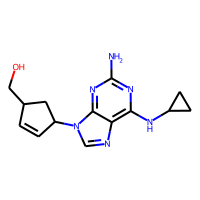
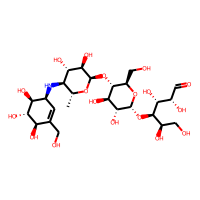
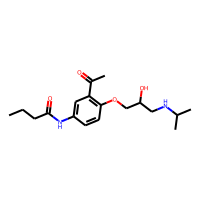
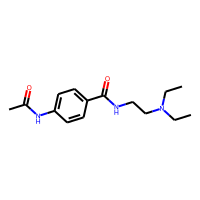
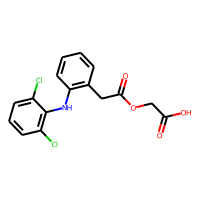

In [79]:
PandasTools.AddMoleculeColumnToFrame(data, 'SMILES', 'Molecule')
data.head()

In [80]:
def compute_sasa(mol):
    """Compute Solvent Accessible Surface Area.
    """
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol,randomSeed=0xf00d)
    ptable = Chem.GetPeriodicTable()
    radii = [ptable.GetRvdw(atom.GetAtomicNum()) for atom in mol.GetAtoms()]
   
    #radii = rdFreeSASA.classifyAtoms(h_mol)

    # Compute solvent accessible surface area
    sa = rdFreeSASA.CalcSASA(mol, radii)
    
    return sa

In [81]:
data['SASA'] = [compute_sasa(mol) for mol in data['Molecule']]

,Generic Name,SMILES,TPSA,Molecular Weight,No. of Hydrogen Bond Donors,No. of Hydrogen Bond Acceptors,No. of Rotatable Bonds,Number of Aromatic Rings,Number of Rings,Molar Refractivity,LogP,LogBB,CNS,SMILES (1),COOH or COO-,ASA,Molecule,SASA
0,ABACAVIR SULFATE,OCC1C=CC(n2c3nc(N)nc(NC4CC4)c3nc2)C1,101.880000,286.32999,4,7,4,2,4,75.809998,1.32,0.19,Penetrant,OCC1C=CC(n2c3nc(N)nc(NC4CC4)c3nc2)C1,0,532.42694,,527.131138
1,ACARBOS,O=C[C@H](O)[C@@H](O)[C@H](O[C@@H]1[C@H](O)[C@@...,329.010010,645.59998,14,19,13,0,3,141.880000,-4.47,-2.00,Non-penetrant,O=C[C@H](O)[C@@H](O)[C@H](O[C@H]1[C@H](O)[C@H]...,0,862.85767,,859.737194
2,ACEBUTOLOL,O=C(Nc1cc(C(=O)C)c(OCC(O)CNC(C)C)cc1)CCC,87.660004,336.42999,3,6,10,1,1,94.709999,1.68,0.33,Non-penetrant,O=C(Nc1cc(C(=O)C)c(OCC(O)CNC(C)C)cc1)CCC,0,654.40796,,637.390719
3,ACECAINIDE,O=C(Nc1ccc(C(=O)NCCN(CC)CC)cc1)C,61.439999,277.35999,2,5,7,1,1,81.029999,1.30,0.17,Penetrant,O=C(Nc1ccc(C(=O)NCCN(CC)CC)cc1)C,0,562.76910,,581.009745
4,ACECLOFENAC,Clc1c(Nc2c(CC(=O)OCC(=O)O)cccc2)c(Cl)ccc1,75.629997,354.17999,2,5,7,2,2,87.570000,4.15,-0.49,Non-penetrant,Clc1c(Nc2c(CC(=O)OCC(=O)O)cccc2)c(Cl)ccc1,1,525.16724,,567.624501

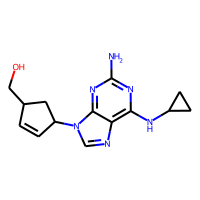
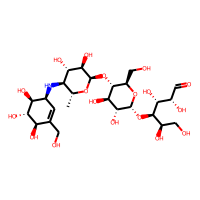
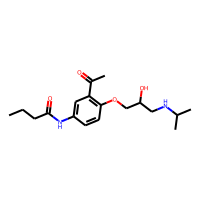
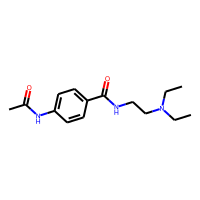
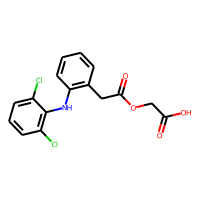

In [82]:
data.head()

In [88]:
del data['Molecule']

In [90]:
data.to_csv('previous_paper_compounds_values_and_ASA_SASA.csv', index=False)